In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the nutrients dataframe and a general dataframe to get the 'nutriscore_grade' column

In [3]:
df = pd.read_csv('Data/cleaned_csv/openfoodfacts_nutrients_clean.csv', sep=',', header=0)
df_grade = pd.read_csv('Data/cleaned_csv/openfoodfacts_france_only.csv', sep=',', header=0)

C:\Users\tiger\AppData\Local\Temp\ipykernel_28536\4021274885.py:2: DtypeWarning: Columns (0,23,26,36,71,74,75,78,79,81,82,83,84,85,86,87,88,89,91,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df_grade = pd.read_csv('Data/cleaned_csv/openfoodfacts_france_only.csv', sep=',', header=0)


### Ordinal encoding of 'nutriscore_grade'

In [4]:
df_grade['nutriscore_grade'].replace({
    'a': 1,
    'b': 2,
    'c': 3,
    'd': 4,
    'e': 5
}, inplace=True)

C:\Users\tiger\AppData\Local\Temp\ipykernel_28536\883079500.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_grade['nutriscore_grade'].replace({
C:\Users\tiger\AppData\Local\Temp\ipykernel_28536\883079500.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_grade['nutriscore_grade'].replace(

### Data normalization

In [5]:
scaler = MinMaxScaler()

df[[col for col in df.columns if col.endswith('_100g')]] = scaler.fit_transform(df[[col for col in df.columns if col.endswith('_100g')]])

### Splitting data for training and testing

In [6]:
X = df
y = df_grade['nutriscore_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

### Training with LogisticRegression

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy :", accuracy)
print("Confusion matrix :\n", conf_matrix)
print("Classification report :\n", report)

KeyboardInterrupt: 

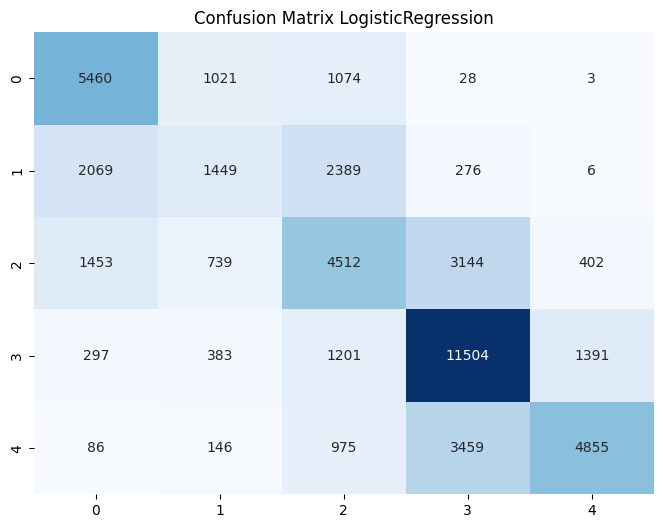

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix LogisticRegression")
plt.show()

In [9]:
accuracy_data = {"Model": ["Logistic Regression"], "Accuracy": [accuracy * 100]}

plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="Accuracy", data=accuracy_data, palette="Blues")
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for clarity
plt.ylabel("Accuracy (%)")
plt.title("Logistic Regression Model Accuracy")
plt.show()

NameError: name 'accuracy' is not defined

### Training with RandomForestClassifier

In [10]:
model = RandomForestClassifier(
    n_estimators=100,       # More trees = stronger model
    max_depth=10,           # Reducing max_depth = reducing overfitting
    max_features='sqrt',
    min_samples_split=8,
    min_samples_leaf=2,
    bootstrap=True,
    random_state=42
    )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy :", accuracy)
print("Confusion matrix :\n", conf_matrix)
print("Classification report :\n", report)

Accuracy : 0.8445221638177228
Confusion matrix :
 [[ 6492   768   239    15    72]
 [  937  4128   964    63    97]
 [  136   645  8091  1162   216]
 [  136    40   551 13625   424]
 [   74   133    88   753  8473]]
Classification report :
               precision    recall  f1-score   support

           1       0.83      0.86      0.85      7586
           2       0.72      0.67      0.69      6189
           3       0.81      0.79      0.80     10250
           4       0.87      0.92      0.90     14776
           5       0.91      0.89      0.90      9521

    accuracy                           0.84     48322
   macro avg       0.83      0.82      0.83     48322
weighted avg       0.84      0.84      0.84     48322



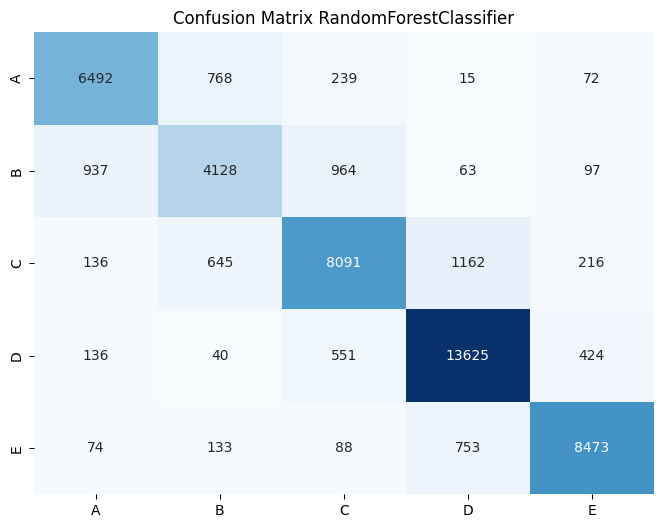

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['A', 'B', 'C', 'D', 'E'], yticklabels=['A', 'B', 'C', 'D', 'E'])
plt.title("Confusion Matrix RandomForestClassifier")
plt.show()

C:\Users\tiger\AppData\Local\Temp\ipykernel_21848\2242538138.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=accuracy_data, palette="Blues")


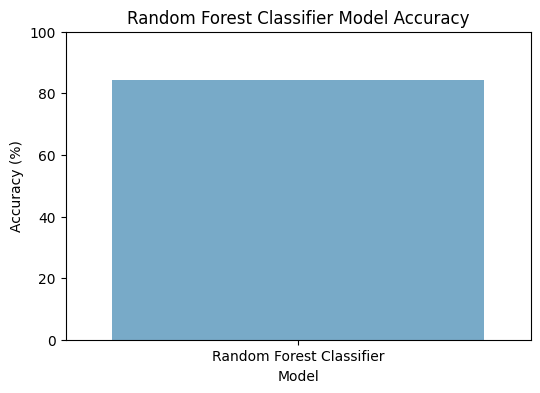

In [ ]:
accuracy_data = {"Model": ["Random Forest Classifier"], "Accuracy": [accuracy * 100]}

plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="Accuracy", data=accuracy_data, palette="Blues")
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for clarity
plt.ylabel("Accuracy (%)")
plt.title("Random Forest Classifier Model Accuracy")
plt.show()

### Cross-Validation on RandomForestClassifier with 10 folds

In [24]:
k = 10
scores = cross_val_score(model, X, y, cv=k)

print("Cross-validation scores for each fold:", scores)
print("Average cross-validation score:", np.mean(scores))

Cross-validation scores for each fold: [0.83104144 0.84761757 0.86208288 0.85761291 0.85050442 0.8494133
 0.83221581 0.82017135 0.83618923 0.80822003]
Average cross-validation score: 0.8395068949549046


### GridSearch to determine best parameters for the RandomForestClassifier

In [80]:
parameters = {'min_samples_leaf': [2, 4, 6, 8, 10]}

model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', min_samples_split=8, bootstrap=True, random_state=42)

gs = GridSearchCV(model, parameters, cv=5, scoring='roc_auc_ovr', verbose=1)
gs.fit(X_train, y_train)
display(gs.best_params_)
display(gs.best_score_)
display(gs.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'min_samples_leaf': 2}

np.float64(0.9682570856775389)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=8,
                       random_state=42)

### Saving the trained model as a save file

In [25]:
from joblib import dump

In [26]:
dump(model, 'nutriscore_model.joblib')

['nutriscore_model.joblib']